Imports

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot
import scipy.stats as stats

import os
from os import listdir
from os.path import isfile, join
import glob
pd.set_option('display.max_columns', 50)

#### Read all files and check the dfs

In [20]:
#folder = "\Archive_5"
folder = ""
households = pd.read_csv(f"..\Datalogs{folder}\Households.csv")
cons_firms = pd.read_csv(f"..\Datalogs{folder}\Consumer_Firms.csv")
cap_firms = pd.read_csv(f"..\Datalogs{folder}\Capital_Firms.csv")
pboard = pd.read_csv(f"..\Datalogs{folder}\Public_Info_Board.csv")

Check dataframes

In [21]:
households

wealth_financial  wealth_human  expenditure_consumption  \
0                 994.0           0.0                      0.0   
1                 570.0           0.0                      0.0   
2                1254.0           0.0                      0.0   
3                1046.0           0.0                      0.0   
4                 900.0           0.0                      0.0   
...                 ...           ...                      ...   
36995             956.0           0.0                      0.0   
36996             698.0           0.0                   1098.0   
36997            1105.0           0.0                      0.0   
36998             661.0           0.0                      0.0   
36999            1527.0           0.0                      0.0   

       expenditure_tax  consumption_propensity  new_savings  \
0                  0.0                0.378129          0.0   
1                  0.0                0.668312          0.0   
2                  0.0                0.427101          0.0   
3                  0.0                0.500811          0.0   
4                  0.0                0.400582          0.0   
...                ...                     ...          ...   
36995              0.0                0.565731          6.0   
36996              0.0                0.604079         23.0   
36997              0.0                0.533104          5.0   
36998              0.0                0.327353          7.0   
36999              0.0                0.510437          3.0   

       cash_on_hand_real_desired  cash_on_hand_desired  cash_on_hand_current  \
0                            0.0                   0.0                   0.0   
1                            0.0                   0.0                   0.0   
2                            0.0                   0.0                   0.0   
3                            0.0                   0.0                   0.0   
4                            0.0                   0.0                   0.0   
...                          ...                   ...                   ...   
36995                        0.0                   0.0                   0.0   
36996                        0.0                 124.0                   0.0   
36997                        0.0                  -1.0                   0.0   
36998                        0.0                  -1.0                   0.0   
36999                        0.0                 159.0                   0.0   

       saving_propensity  saving_propensity_optimist  \
0               0.199166                    0.199166   
1               0.128466                    0.128466   
2               0.242377                    0.242377   
3               0.207816                    0.207816   
4               0.183386                    0.183386   
...                  ...                         ...   
36995           0.291772                    0.191772   
36996           0.145856                    0.145856   
36997           0.316746                    0.216746   
36998           0.242451                    0.142451   
36999           0.387410                    0.287410   

       saving_propensity_pessimist  income_current  income_average  \
0                         0.299166             0.0             0.0   
1                         0.228466             0.0             0.0   
2                         0.342377             0.0             0.0   
3                         0.307816             0.0             0.0   
4                         0.283386             0.0             0.0   
...                            ...             ...             ...   
36995                     0.291772             0.0            -3.0   
36996                     0.245856          1291.0           852.0   
36997                     0.316746             0.0            -6.0   
36998                     0.242451             0.0            -5.0   
36999                     0.387410             0.0   

In [22]:
cons_firms

production_current  production_planned  production_past  quantity_sold  \
0                 6800.0                 0.0              0.0         1687.0   
1                 6200.0                 0.0              0.0         2571.0   
2                 6300.0                 0.0              0.0         2838.0   
3                 5800.0                 0.0              0.0         1649.0   
4                 6000.0                 0.0              0.0         2963.0   
...                  ...                 ...              ...            ...   
1290               720.0               720.0            500.0            0.0   
1291                 0.0                 0.0              0.0            0.0   
1292                 0.0                 0.0            339.0            0.0   
1293                52.0                52.0           1273.0            0.0   
1294               340.0               340.0            566.0            0.0   

      total_income  revenue_sales  new_loan_issuance  subsidies  \
0              0.0            0.0                0.0        0.0   
1              0.0            0.0                0.0        0.0   
2              0.0            0.0                0.0        0.0   
3              0.0            0.0                0.0        0.0   
4              0.0            0.0                0.0        0.0   
...            ...            ...                ...        ...   
1290           0.0            0.0            52806.0        0.0   
1291           0.0            0.0            10564.0        0.0   
1292           0.0            0.0            27220.0        0.0   
1293           0.0            0.0            57309.0        0.0   
1294           0.0            0.0             6226.0        0.0   

      good_price_current  good_price_past  average_profit  \
0               13.35780          9.50000             0.0   
1               10.91580          9.50000             0.0   
2               11.31720          9.50000             0.0   
3                9.51891          9.50000             0.0   
4               10.08960          9.50000             0.0   
...                  ...              ...             ...   
1290             8.99345          8.45859          1751.0   
1291             9.18773         10.01070             0.0   
1292             6.64926          9.76837          2585.0   
1293             8.50982          7.68279          1984.0   
1294             8.60906          6.99670          1259.0   

      average_sale_quantity  short_term_funding_gap  long_term_funding_gap  \
0                    1687.0                     0.0                    0.0   
1                    2571.0                     0.0                    0.0   
2                    2838.0                     0.0                    0.0   
3                    1649.0                     0.0                    0.0   
4                    2963.0                     0.0                    0.0   
...                     ...                     ...                    ...   
1290                  350.0                -31811.0               -16538.0   
1291                    2.0                -16417.0                    0.0   
1292                  573.0                -28966.0                    0.0   
1293                  530.0                -10635.0                    0.0   
1294                  287.0                -44913.0                    0.0   

      total_liabilities  labor_wage_bill  capital_costs  tax_payments  \
0                   0.0          49599.0            0.0           0.0   
1                   0.0          30699.0            0.0           0.0   
2                   0.0          33516.0            0.0           0.0   
3                   0.0              0.0            0.0           0.0   
4                   0.0          25325.0            0.0           0.0   
...                 ...              ...            ...           ...   
1290             7762.0           7042.0            0.0    

In [23]:
cap_firms

production_current  production_planned  production_past  quantity_sold  \
0                 680.0        0.000000e+00              0.0   3.890000e+02   
1                 620.0        0.000000e+00              0.0   2.680000e+02   
2                 630.0        0.000000e+00              0.0   2.750000e+02   
3                 580.0        0.000000e+00              0.0   2.860000e+02   
4                 600.0        0.000000e+00              0.0   1.630000e+02   
..                  ...                 ...              ...            ...   
180               100.0        3.505474e+07             50.0  -1.387740e+09   
181                50.0        1.419247e+09              0.0  -9.603566e+08   
182                 0.0        0.000000e+00             50.0   2.115982e+09   
183                 0.0        0.000000e+00              0.0  -9.706450e+08   
184               150.0        1.471667e+09            100.0  -3.465655e+08   

     total_income  revenue_sales  new_loan_issuance  subsidies  \
0             0.0            0.0       0.000000e+00        0.0   
1             0.0            0.0       0.000000e+00        0.0   
2             0.0            0.0       0.000000e+00        0.0   
3             0.0            0.0       0.000000e+00        0.0   
4             0.0            0.0       0.000000e+00        0.0   
..            ...            ...                ...        ...   
180  -417608064.0   -417608064.0       1.867661e+09        0.0   
181   -61968656.0    -61968656.0      -4.641538e+08        0.0   
182   139649088.0    139649088.0      -6.722396e+08        0.0   
183   -60152828.0    -60152828.0       2.138089e+09        0.0   
184   -26149248.0    -26149248.0      -5.442875e+08        0.0   

     good_price_current  good_price_past  average_profit  \
0             13.357800         9.500000    0.000000e+00   
1             10.915800         9.500000    0.000000e+00   
2             11.317200         9.500000    0.000000e+00   
3              9.518910         9.500000    0.000000e+00   
4             10.089600         9.500000    0.000000e+00   
..                  ...              ...             ...   
180            0.160416         0.300927   -1.050042e+09   
181            0.064527         0.064527   -2.998287e+08   
182            0.065997         0.065997   -3.769263e+08   
183            0.057475         0.061972   -1.565349e+07   
184            0.075452         0.075452   -3.754689e+08   

     average_sale_quantity  short_term_funding_gap  long_term_funding_gap  \
0                    389.0            0.000000e+00           0.000000e+00   
1                    268.0            0.000000e+00           0.000000e+00   
2                    275.0            0.000000e+00           0.000000e+00   
3                    286.0            0.000000e+00           0.000000e+00   
4                    163.0            0.000000e+00           0.000000e+00   
..                     ...                     ...                    ...   
180            627451968.0            0.000000e+00          -3.052118e+08   
181            423142464.0           -1.587366e+09          -4.641538e+08   
182            244752384.0            0.000000e+00          -6.722396e+08   
183           -772723712.0           -2.069340e+09           2.138089e+09   
184           -196865328.0           -7.224252e+08          -5.442875e+08   

     total_liabilities  labor_wage_bill  capital_costs  tax_payments  \
0         0.000000e+00          49599.0            0.0           0.0   
1         0.000000e+00          30699.0            0.0           0.0   
2         0.000000e+00          33516.0            0.0           0.0   
3         0.000000e+00              0.0            0.0           0.0   
4         0.000000e+00          25325.0            0.0           0.0   
..                 ...              ...            ...           ...   
180      -7.794961e+08          11370.0            0.0    68095928.0   
181      -1.395005e+09           3550.0  

In [24]:
pboard.head()

price_level_current  price_level_previous  cap_price_level_current  \
0              10.2573                0.0000                  10.8367   
1              10.2573               10.2573                  10.8367   
2              11.8318               10.2573                  11.6819   
3              12.5503               11.8318                  11.1643   
4              12.1608               12.5503                  12.3168   

   cap_price_level_previous  average_wage_market  average_wage_employed  \
0                    0.0000             0.000000               0.000000   
1                   10.8367           946.505981            1215.140015   
2                   10.8367           722.544983             964.929993   
3                   11.6819           776.838989             885.265991   
4                   11.1643          1189.800049            1133.260010   

     r_rate  inflation_current  household_sentiment_sum  \
0  0.000000            0.00000                      0.0   
1  0.000000            1.04489                    609.0   
2  0.225729            1.20049                    283.0   
3  0.327464            1.26831                    199.0   
4  0.261076            1.22405                     57.0   

   household_sentiment_percentage  cons_firm_sentiment_sum  \
0                             0.0                      0.0   
1                             0.0                      0.0   
2                             0.0                     11.0   
3                             0.0                      4.0   
4                             0.0                      3.0   

   cons_firm_sentiment_percentage  cap_firm_sentiment_sum  \
0                             0.0                     0.0   
1                             0.0                     0.0   
2                             0.0                     0.0   
3                             0.0                     0.0   
4                             0.0                     0.0   

   cap_firm_sentiment_percentage  machine_orders  machine_orders_planned  \
0                            0.0             0.0           -1.163006e+09   
1                            0.0          -671.0            0.000000e+00   
2                            0.0         -1054.0            0.000000e+00   
3                            0.0          -172.0            0.000000e+00   
4                            0.0          -222.0            0.000000e+00   

   machine_spending  consumer_orders  consumer_spending  consumption_budgets  \
0               0.0              0.0                0.0        -1.163006e+09   
1           -7317.0          90530.0           837882.0         8.417380e+05   
2           -9149.0          44308.0           309480.0         3.107340e+05   
3           -1799.0          26310.0           204295.0         2.051770e+05   
4           -2396.0           6996.0            62903.0         6.316500e+04   

   consumer_goods_production  capital_goods_production  \
0                        0.0                       0.0   
1                   151140.0                    2499.0   
2                    46826.0                       0.0   
3                    29488.0                       0.0   
4                     7140.0                       0.0   

   consumer_goods_production_planned  capital_goods_production_planned  \
0                                0.0                               0.0   
1                           156336.0                            2499.0   
2                            73301.0                               0.0   
3                            40256.0                               0.0   
4                            19302.0                               0.0   

   n_employed  n_unemployed  unemp_rate  empl_hires  new_empl_demand  \
0         0.0           0.0       0.000       733.0              0.0   
1       891.0         109.0       0.109       266.0           -108.0   
2       401.0         599.0       0.599       212.0           -702.0  

Get sums and averages for each timestep

In [25]:
households_sum = households.groupby('date').sum().reset_index()
households_avg = households.groupby('date').mean().reset_index()
cons_firms_sum = cons_firms.groupby('date').sum().reset_index()
cons_firms_avg = cons_firms.groupby('date').mean().reset_index()
cap_firms_sum = cap_firms.groupby('date').sum().reset_index()
cap_firms_avg = cap_firms.groupby('date').mean().reset_index()

In [26]:
households

wealth_financial  wealth_human  expenditure_consumption  \
0                 994.0           0.0                      0.0   
1                 570.0           0.0                      0.0   
2                1254.0           0.0                      0.0   
3                1046.0           0.0                      0.0   
4                 900.0           0.0                      0.0   
...                 ...           ...                      ...   
36995             956.0           0.0                      0.0   
36996             698.0           0.0                   1098.0   
36997            1105.0           0.0                      0.0   
36998             661.0           0.0                      0.0   
36999            1527.0           0.0                      0.0   

       expenditure_tax  consumption_propensity  new_savings  \
0                  0.0                0.378129          0.0   
1                  0.0                0.668312          0.0   
2                  0.0                0.427101          0.0   
3                  0.0                0.500811          0.0   
4                  0.0                0.400582          0.0   
...                ...                     ...          ...   
36995              0.0                0.565731          6.0   
36996              0.0                0.604079         23.0   
36997              0.0                0.533104          5.0   
36998              0.0                0.327353          7.0   
36999              0.0                0.510437          3.0   

       cash_on_hand_real_desired  cash_on_hand_desired  cash_on_hand_current  \
0                            0.0                   0.0                   0.0   
1                            0.0                   0.0                   0.0   
2                            0.0                   0.0                   0.0   
3                            0.0                   0.0                   0.0   
4                            0.0                   0.0                   0.0   
...                          ...                   ...                   ...   
36995                        0.0                   0.0                   0.0   
36996                        0.0                 124.0                   0.0   
36997                        0.0                  -1.0                   0.0   
36998                        0.0                  -1.0                   0.0   
36999                        0.0                 159.0                   0.0   

       saving_propensity  saving_propensity_optimist  \
0               0.199166                    0.199166   
1               0.128466                    0.128466   
2               0.242377                    0.242377   
3               0.207816                    0.207816   
4               0.183386                    0.183386   
...                  ...                         ...   
36995           0.291772                    0.191772   
36996           0.145856                    0.145856   
36997           0.316746                    0.216746   
36998           0.242451                    0.142451   
36999           0.387410                    0.287410   

       saving_propensity_pessimist  income_current  income_average  \
0                         0.299166             0.0             0.0   
1                         0.228466             0.0             0.0   
2                         0.342377             0.0             0.0   
3                         0.307816             0.0             0.0   
4                         0.283386             0.0             0.0   
...                            ...             ...             ...   
36995                     0.291772             0.0            -3.0   
36996                     0.245856          1291.0           852.0   
36997                     0.316746             0.0            -6.0   
36998                     0.242451             0.0            -5.0   
36999                     0.387410             0.0   

Calculate number of agents

In [28]:
timestep = int(households['date'].max())
#timestep = 15
n_households = households.shape[0] / (timestep+1)
n_cons_firms = cons_firms.shape[0] / (timestep +1)
n_cap_firms = cap_firms.shape[0] / (timestep +1)
t = np.linspace(0,timestep, timestep +1)

In [29]:
n_households

1000.0

## Plot the data

In [30]:
import matplotlib.pyplot as plt
import random

def plot_values(df, t, average, exclude_cols=[]):
    cols = [col for col in df.columns if col not in exclude_cols]
    num_plots = len(cols)
    num_cols = 3
    num_rows = num_plots // num_cols + (num_plots % num_cols > 0)
    fig, axs = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 5*num_rows))
    axs = axs.flatten()

    for i, column in enumerate(cols):
        title = column + ": (average)" if average else column + ": (sum)"
        color = "#" + ''.join([random.choice('0123456789ABCDEF') for j in range(6)])
        axs[i].plot(t, df[column], label=title, color=color)
        axs[i].set_xlabel('Timestep')
        axs[i].set_ylabel('Values')
        axs[i].set_title(column)
        axs[i].legend()
        axs[i].grid(True)
    plt.tight_layout()
    plt.show()


### Plot Households

In [31]:
households

wealth_financial  wealth_human  expenditure_consumption  \
0                 994.0           0.0                      0.0   
1                 570.0           0.0                      0.0   
2                1254.0           0.0                      0.0   
3                1046.0           0.0                      0.0   
4                 900.0           0.0                      0.0   
...                 ...           ...                      ...   
36995             956.0           0.0                      0.0   
36996             698.0           0.0                   1098.0   
36997            1105.0           0.0                      0.0   
36998             661.0           0.0                      0.0   
36999            1527.0           0.0                      0.0   

       expenditure_tax  consumption_propensity  new_savings  \
0                  0.0                0.378129          0.0   
1                  0.0                0.668312          0.0   
2                  0.0                0.427101          0.0   
3                  0.0                0.500811          0.0   
4                  0.0                0.400582          0.0   
...                ...                     ...          ...   
36995              0.0                0.565731          6.0   
36996              0.0                0.604079         23.0   
36997              0.0                0.533104          5.0   
36998              0.0                0.327353          7.0   
36999              0.0                0.510437          3.0   

       cash_on_hand_real_desired  cash_on_hand_desired  cash_on_hand_current  \
0                            0.0                   0.0                   0.0   
1                            0.0                   0.0                   0.0   
2                            0.0                   0.0                   0.0   
3                            0.0                   0.0                   0.0   
4                            0.0                   0.0                   0.0   
...                          ...                   ...                   ...   
36995                        0.0                   0.0                   0.0   
36996                        0.0                 124.0                   0.0   
36997                        0.0                  -1.0                   0.0   
36998                        0.0                  -1.0                   0.0   
36999                        0.0                 159.0                   0.0   

       saving_propensity  saving_propensity_optimist  \
0               0.199166                    0.199166   
1               0.128466                    0.128466   
2               0.242377                    0.242377   
3               0.207816                    0.207816   
4               0.183386                    0.183386   
...                  ...                         ...   
36995           0.291772                    0.191772   
36996           0.145856                    0.145856   
36997           0.316746                    0.216746   
36998           0.242451                    0.142451   
36999           0.387410                    0.287410   

       saving_propensity_pessimist  income_current  income_average  \
0                         0.299166             0.0             0.0   
1                         0.228466             0.0             0.0   
2                         0.342377             0.0             0.0   
3                         0.307816             0.0             0.0   
4                         0.283386             0.0             0.0   
...                            ...             ...             ...   
36995                     0.291772             0.0            -3.0   
36996                     0.245856          1291.0           852.0   
36997                     0.316746             0.0            -6.0   
36998                     0.242451             0.0            -5.0   
36999                     0.387410             0.0   

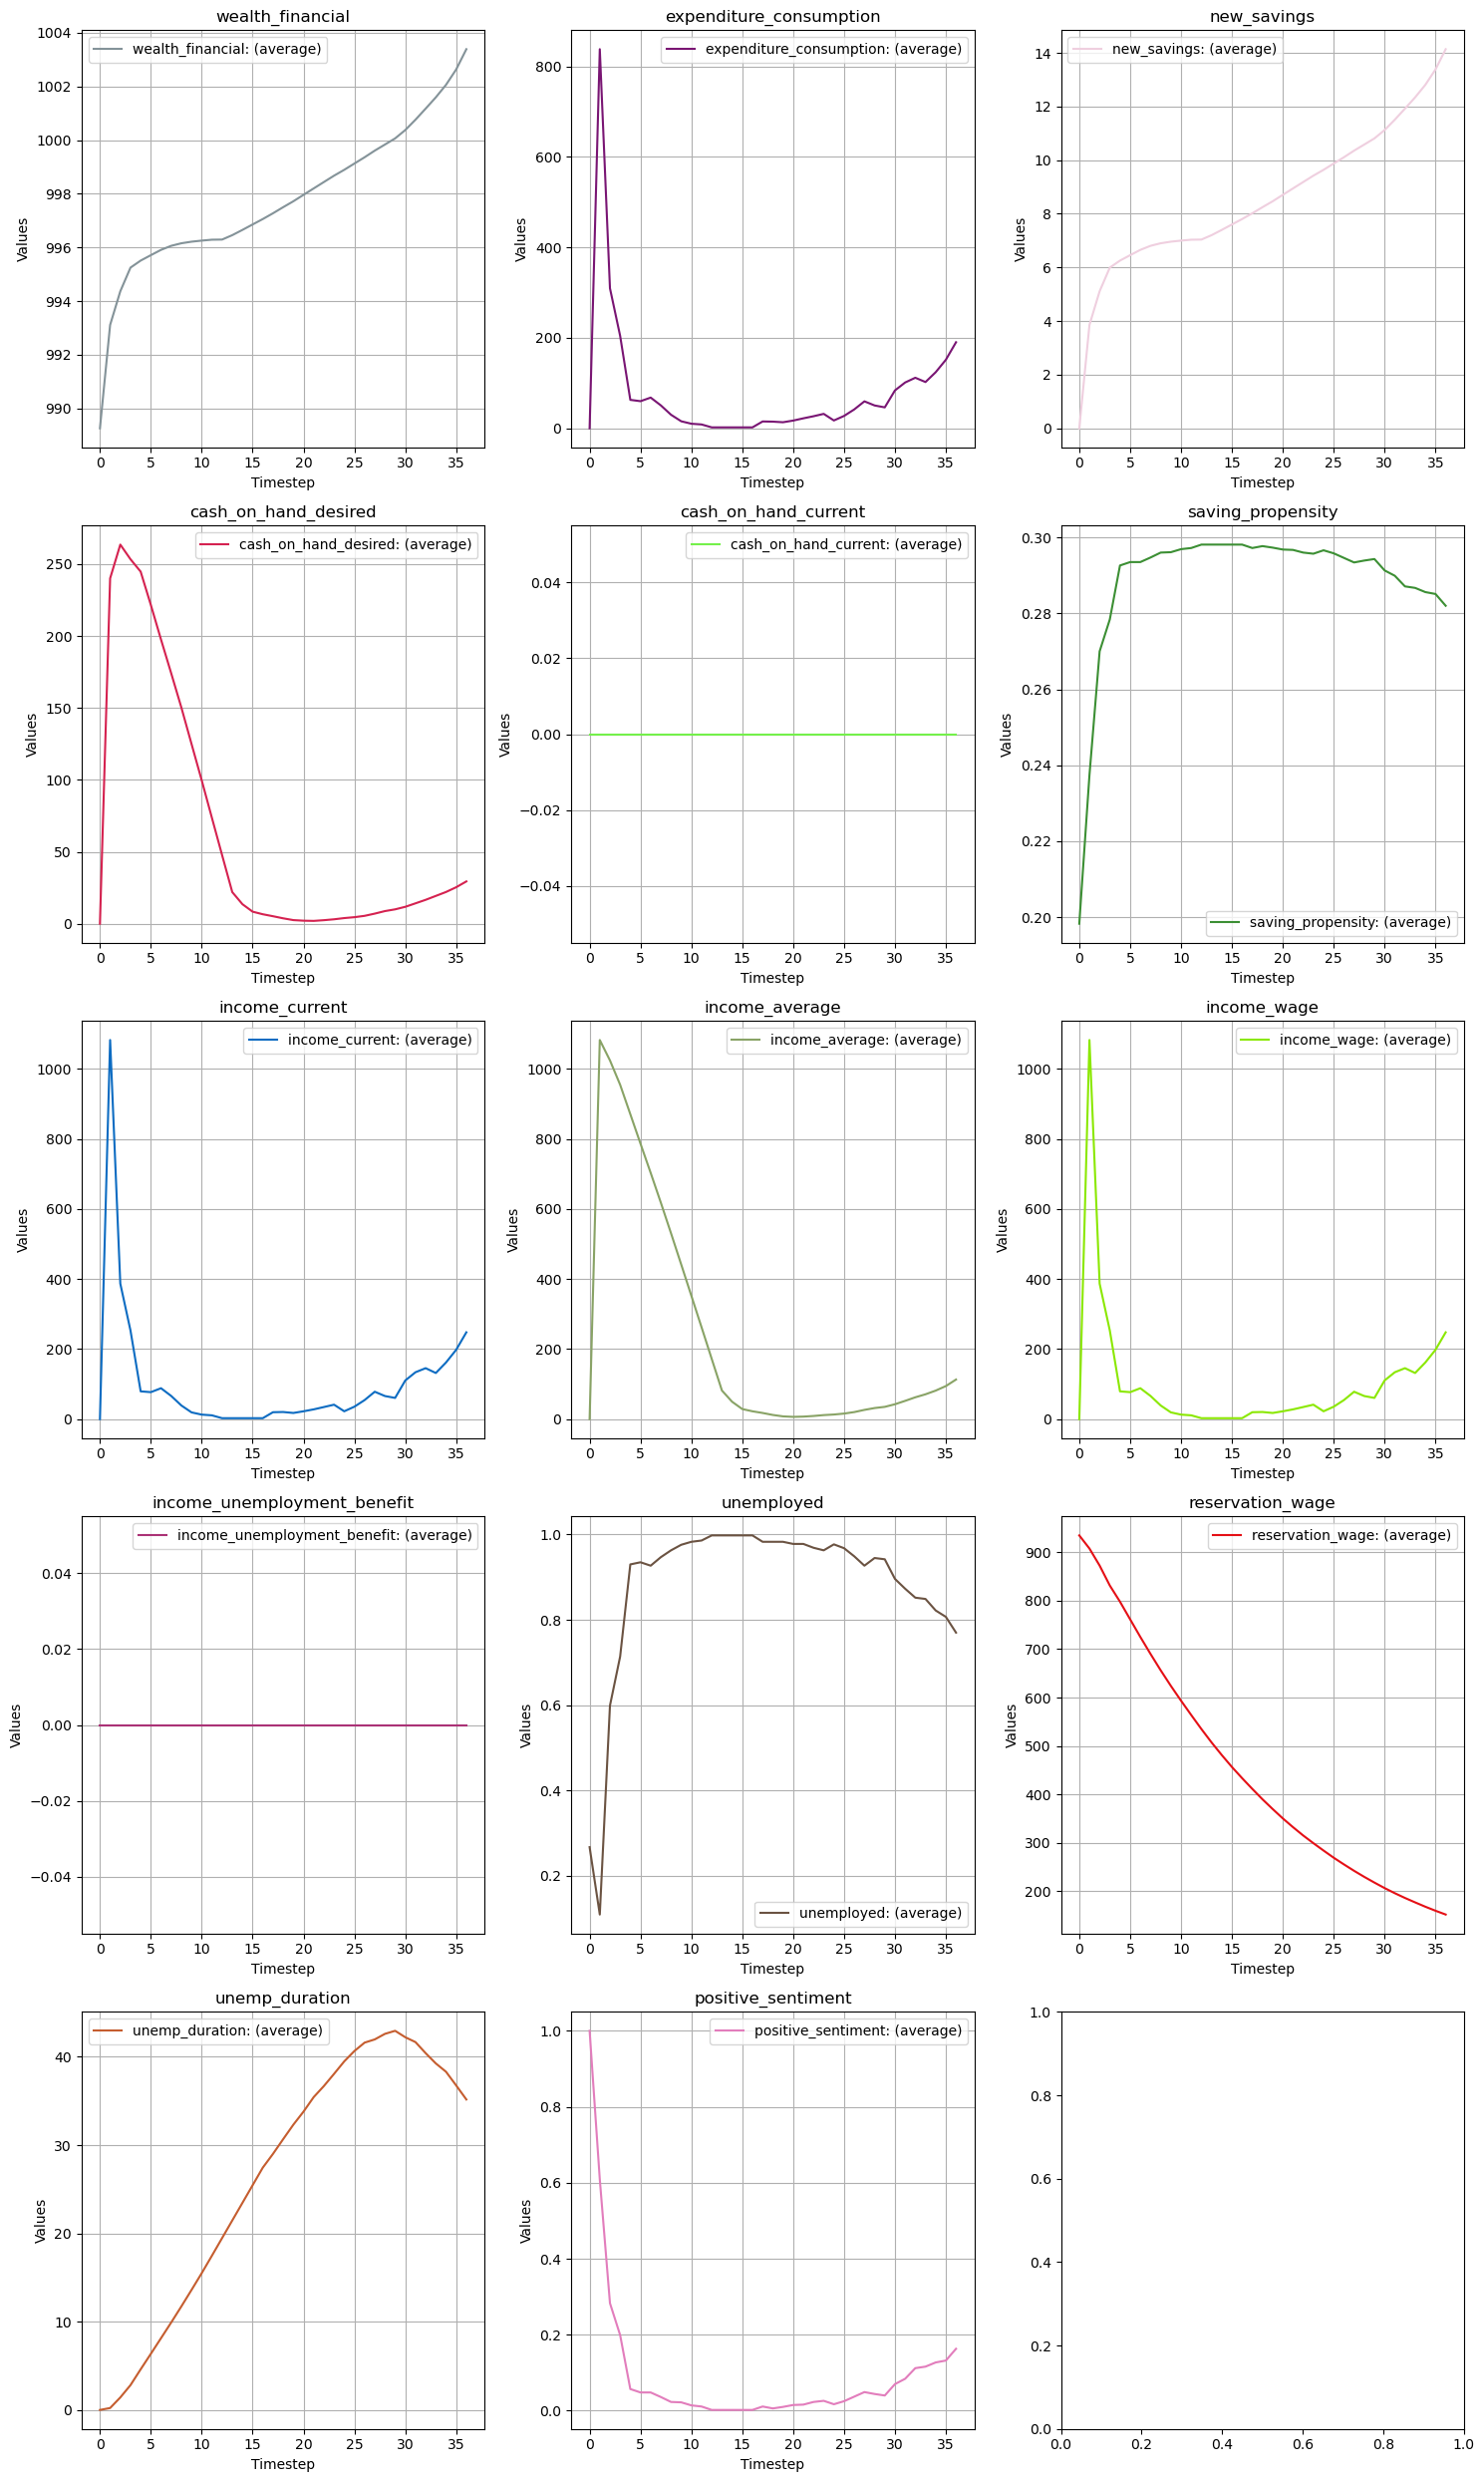

In [32]:
#cols_to_exclude = ['date']
#plot_values(households_sum,t,False, cols_to_exclude)
cols_to_exclude = ['date', "c_f", "c_h", "c_excess_money", "wealth_human", "consumption_propensity","income_gov_transfers", "income_firm_owner_dividend", 
                   "expenditure_tax", "business_owner","cash_on_hand_real_desired",
                   "saving_propensity_optimist", "saving_propensity_pessimist", "p_majority_op_adoption", "unemp_duration_upper_bound"] 
plot_values(households_avg,t,True, cols_to_exclude)

### Plot Consumer Firms

------ Plotting consumer firms -----


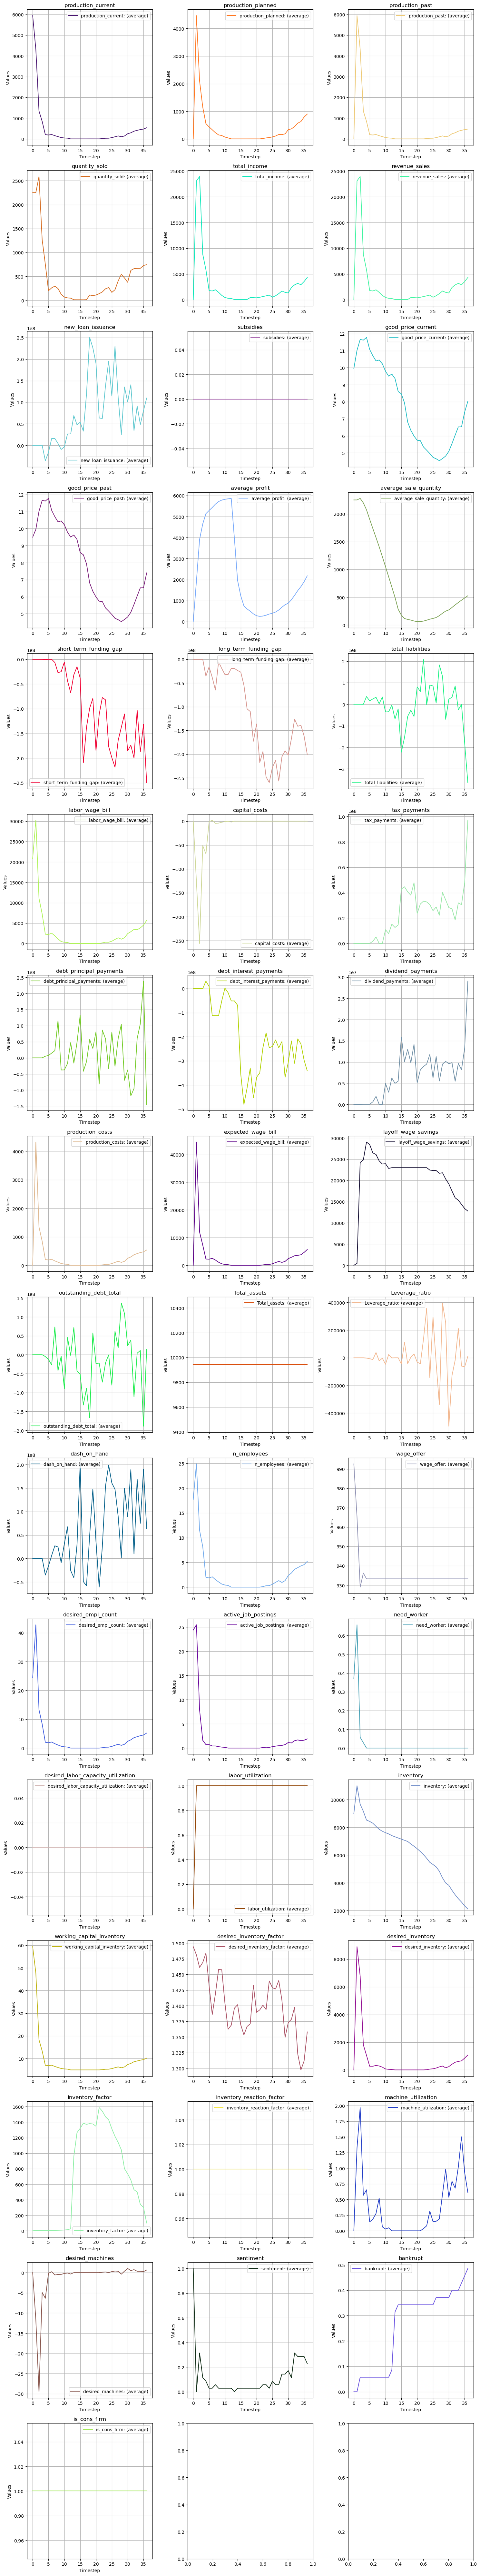

In [33]:
print("------ Plotting consumer firms -----")
cols_to_exclude = ['date']
#plot_values(cons_firms_sum,t,False, cols_to_exclude)
cols_to_exclude = ['date',"subsides", "dividend_ratio", "dividend_ratio_optimistic", "dividend_ratio_pessimistic"]
plot_values(cons_firms_avg,t,True, cols_to_exclude)

### Capital Firms

------ Plotting capital firms -----


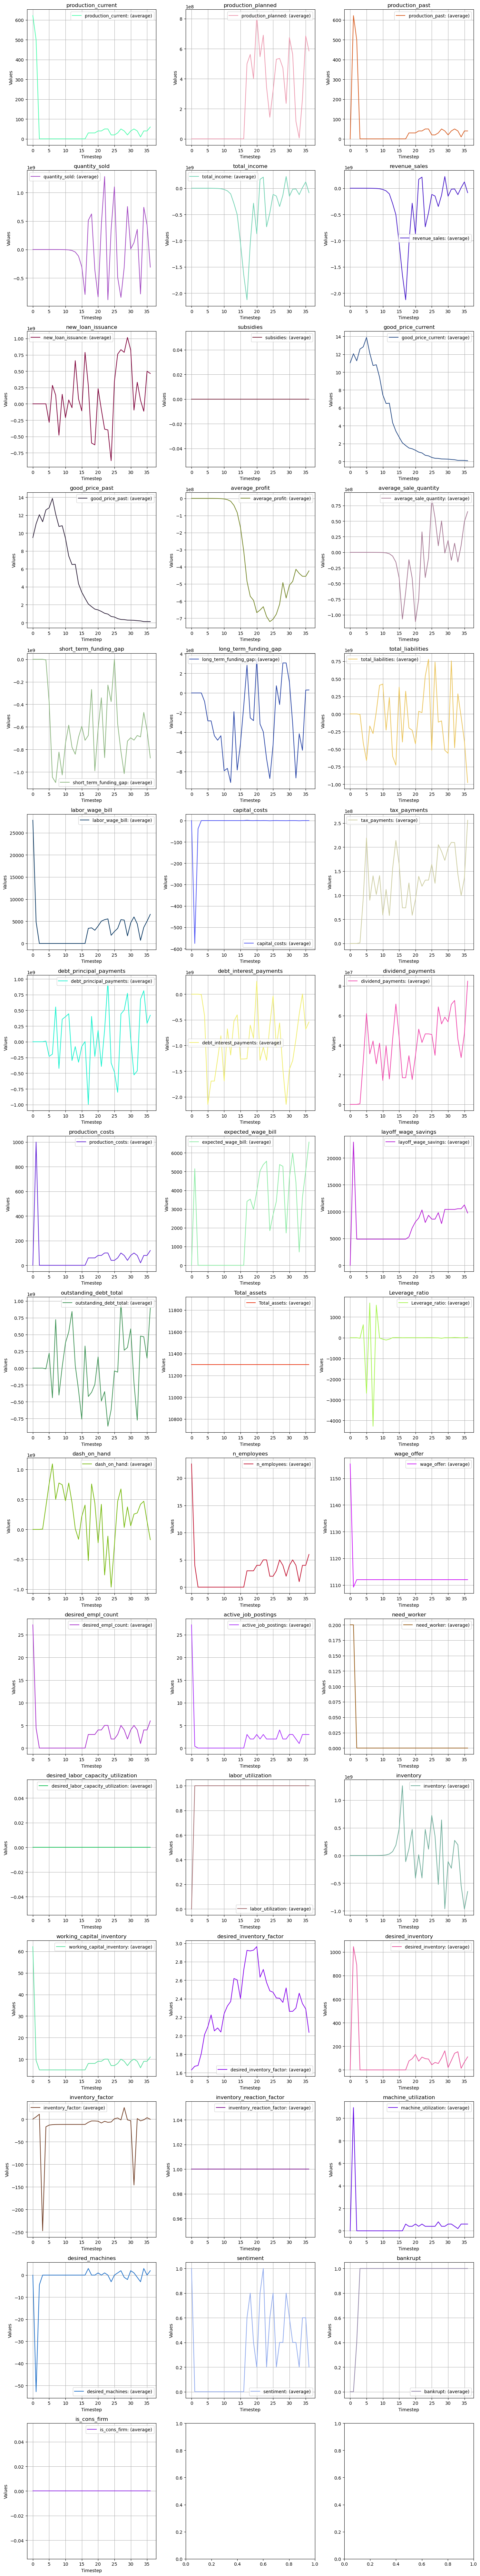

In [34]:
print("------ Plotting capital firms -----")
cols_to_exclude = ['date']
#plot_values(cap_firms_sum,t,False, cols_to_exclude)
cols_to_exclude = ['date',"subsides", "dividend_ratio", "dividend_ratio_optimistic", "dividend_ratio_pessimistic"]
plot_values(cap_firms_avg,t,True, cols_to_exclude)

### Print Public Board

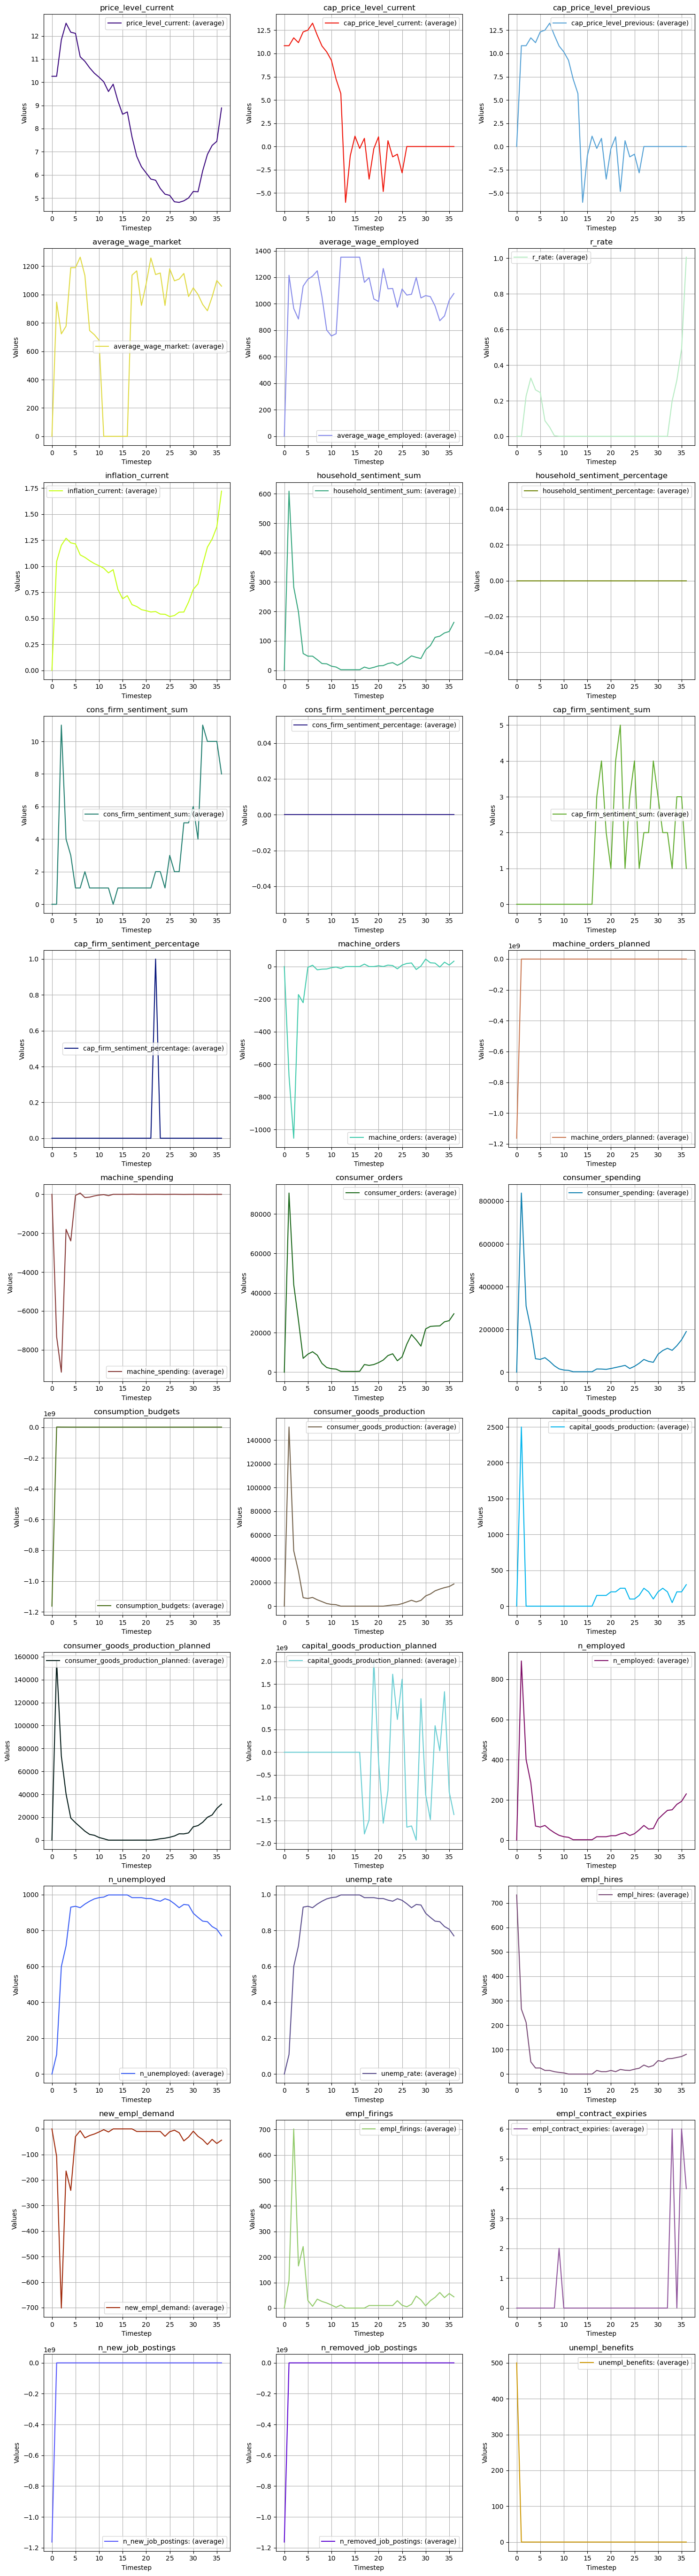

In [35]:
cols_to_exclude = ['date', "price_level_previous","cap_price_level_previous"]
plot_values(pboard,t,True, cols_to_exclude)

To do: